### Takens theorm and very cool [animation](https://www.youtube.com/watch?v=6i57udsPKms)

very interesting [application](https://www.youtube.com/watch?v=831Ell3QNck)

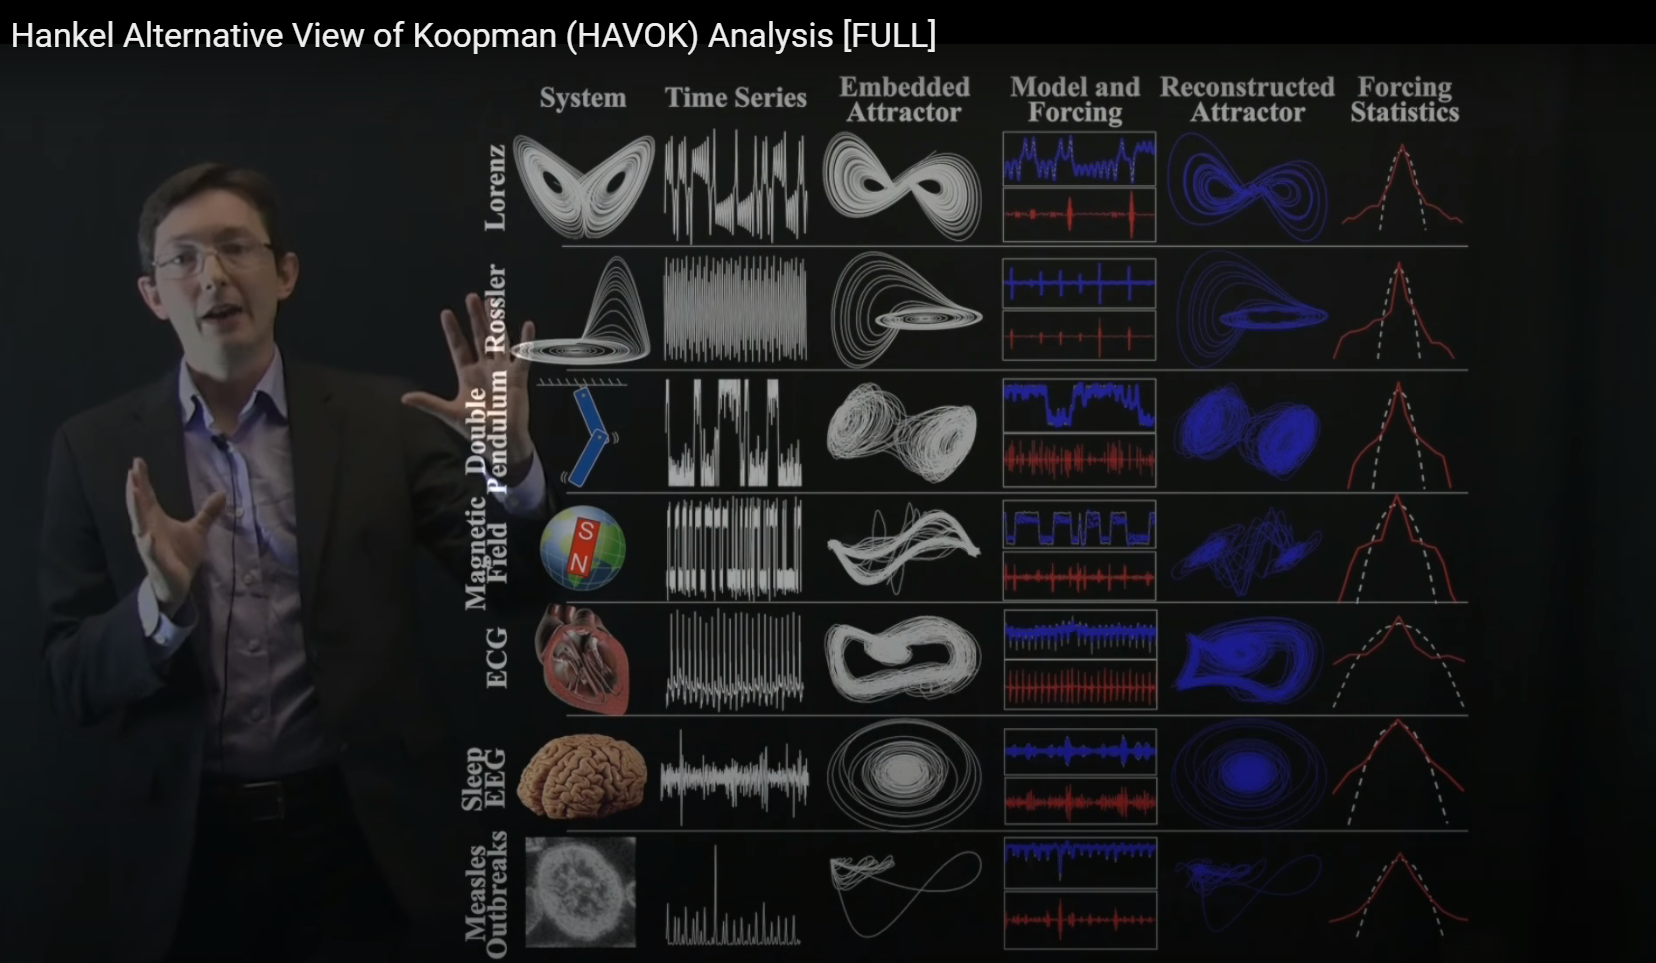

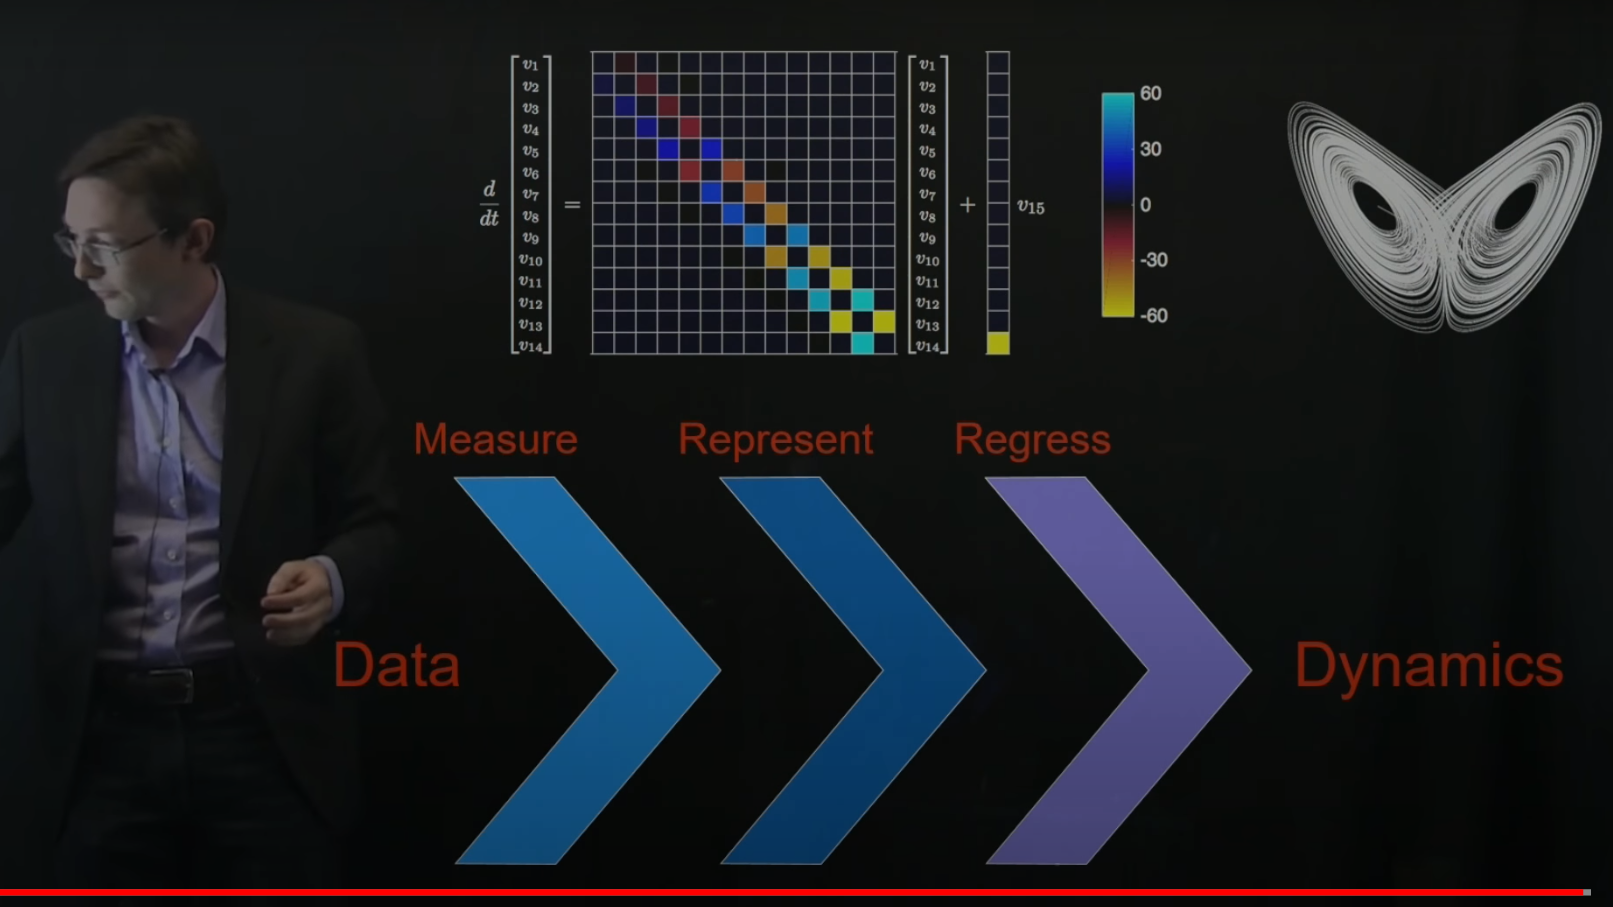

# Delay Embeddings

A. How to handle numerical data in the ecosystem

B. Delay coordinates Embedding

c. Estimating optimal delay time

D. Fast mutual information

[original code](https://github.com/JuliaDynamics/JuliaDynamics/blob/master/tutorials/Youtube_JuliaLang_tutorial/3.%20DelayEmbeddings.ipynb)

[video tutorial](https://www.youtube.com/watch?v=A8g9rdEfdNg)


# A. How to handle numerical data in the ecosystem

In Dynamical systems the functions like `trajectory` and `poincaresos` return a `dataset`. We will now understand what is that `Dataset` 

In [1]:
using DynamicalSystems, Plots

┌ Info: Precompiling DynamicalSystems [61744808-ddfa-5f27-97ff-6e42cc95d634]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [4]:
dataset = Dataset(rand(100,3))

3-dimensional Dataset{Float64} with 100 points
 0.245914   0.13686   0.00378122
 0.686962   0.173465  0.53763
 0.690031   0.527298  0.161841
 0.936113   0.881112  0.512265
 0.23536    0.829678  0.0859561
 0.92416    0.927826  0.792047
 0.529471   0.712884  0.960903
 0.144523   0.727235  0.697077
 0.791038   0.985275  0.471946
 0.338469   0.957341  0.276057
 0.552783   0.135536  0.510546
 0.187166   0.527215  0.224515
 0.261439   0.723245  0.642066
 ⋮                    
 0.18281    0.612986  0.000594185
 0.633823   0.87329   0.999991
 0.665328   0.503729  0.68975
 0.151583   0.468961  0.0870386
 0.710422   0.170699  0.798744
 0.71276    0.118146  0.182238
 0.536421   0.780557  0.233736
 0.0977369  0.882133  0.649144
 0.857795   0.138671  0.746851
 0.86101    0.627042  0.195222
 0.888519   0.503022  0.317015
 0.46187    0.332009  0.981311

A dataset is how we handle numerical data in `DynamicalSystems.jl`. It is a wrapper around `Vector{Svector}`. Besides that, Dataset has matrix type indexing support

In [5]:
typeof(dataset[1])

StaticArrays.SArray{Tuple{3},Float64,1,3}

* When accessing dataset with a single index it acts as a vector of static arrays

In [6]:
dataset[1]

3-element StaticArrays.SArray{Tuple{3},Float64,1,3} with indices SOneTo(3):
 0.24591413422445463
 0.13686010458702746
 0.003781224801673977

In [7]:
dataset[1,2]

0.13686010458702746

In [8]:
dataset[1][2]

0.13686010458702746

In [9]:
dataset[1:20, :]

3-dimensional Dataset{Float64} with 20 points
 0.245914   0.13686   0.00378122
 0.686962   0.173465  0.53763
 0.690031   0.527298  0.161841
 0.936113   0.881112  0.512265
 0.23536    0.829678  0.0859561
 0.92416    0.927826  0.792047
 0.529471   0.712884  0.960903
 0.144523   0.727235  0.697077
 0.791038   0.985275  0.471946
 0.338469   0.957341  0.276057
 0.552783   0.135536  0.510546
 0.187166   0.527215  0.224515
 0.261439   0.723245  0.642066
 0.447957   0.158902  0.294678
 0.0314151  0.697942  0.499999
 0.531551   0.73545   0.515636
 0.69635    0.228972  0.777745
 0.495042   0.322118  0.299465
 0.392306   0.314447  0.322746
 0.696923   0.770991  0.426354

# B. Delay Coordinates Ebmedding

suppose you are in  a situation where you can only measure the evolution of only few variables of a dynamical system, this method can help you to undestand the behaviour of the system.  

**Takens theorem**: In the study of he dynamical systems, a delay embedding theorem gives the conditions under which a chaotic dynamical system can be reconstructed from a sequence of teh observations of a dynamical system. The reconstruction preserves tehe properties of the dynamical system that do not change under the smooth coordinate changes but it doesnot preserve the geometric shape of the structures in the phase space

From a timeseries $s$ once can reconstruct a state-pac $z$ simply by shifitng $s$ in time like

$$z(n) = (s(n), s(n+\tau), s(n+2 \tau)....,s(n+\gamma \tau))$$

In `Dynamicalsystems.jl` this is done in two ways, using functions 
* `reconstruct`($s, \gamma, \tau$) or
* `embed`($s, D, \tau$)

In [10]:
s = rand(1000) # time series
γ = 3          # no of temporal dimension
τ = 1          # delay time

R = reconstruct(s, γ , τ)

4-dimensional Dataset{Float64} with 997 points
 0.915413    0.155599    0.0731178   0.2048
 0.155599    0.0731178   0.2048      0.801101
 0.0731178   0.2048      0.801101    0.771782
 0.2048      0.801101    0.771782    0.442601
 0.801101    0.771782    0.442601    0.633788
 0.771782    0.442601    0.633788    0.56557
 0.442601    0.633788    0.56557     0.903231
 0.633788    0.56557     0.903231    0.890479
 0.56557     0.903231    0.890479    0.250684
 0.903231    0.890479    0.250684    0.0550569
 0.890479    0.250684    0.0550569   0.425025
 0.250684    0.0550569   0.425025    0.289204
 0.0550569   0.425025    0.289204    0.11864
 ⋮                                   
 0.779159    0.653498    0.933926    0.920523
 0.653498    0.933926    0.920523    0.376893
 0.933926    0.920523    0.376893    0.326235
 0.920523    0.376893    0.326235    0.730637
 0.376893    0.326235    0.730637    0.239672
 0.326235    0.730637    0.239672    0.166348
 0.730637    0.239672    0.166348    0.21725

In [11]:
R

4-dimensional Dataset{Float64} with 997 points
 0.915413    0.155599    0.0731178   0.2048
 0.155599    0.0731178   0.2048      0.801101
 0.0731178   0.2048      0.801101    0.771782
 0.2048      0.801101    0.771782    0.442601
 0.801101    0.771782    0.442601    0.633788
 0.771782    0.442601    0.633788    0.56557
 0.442601    0.633788    0.56557     0.903231
 0.633788    0.56557     0.903231    0.890479
 0.56557     0.903231    0.890479    0.250684
 0.903231    0.890479    0.250684    0.0550569
 0.890479    0.250684    0.0550569   0.425025
 0.250684    0.0550569   0.425025    0.289204
 0.0550569   0.425025    0.289204    0.11864
 ⋮                                   
 0.779159    0.653498    0.933926    0.920523
 0.653498    0.933926    0.920523    0.376893
 0.933926    0.920523    0.376893    0.326235
 0.920523    0.376893    0.326235    0.730637
 0.376893    0.326235    0.730637    0.239672
 0.326235    0.730637    0.239672    0.166348
 0.730637    0.239672    0.166348    0.21725

####  How is this helpful ?

What we have dome is the fancy way of producing the highdimensional datset out of our univariate time series. 

Takens theorem says that for a proper choice of $\tau, \gamma$ the reconstructed trajectory is homeomorphic with a true real trajectory of dynamicaal system that we got $s$ from.

Quatities like `Lyapunov exponent`, `Dimension of the attractor`are the same for the real dynamical system and thereconstructed one. Even though we are not sure how many variables the system have in reality.

#### How does the reconstruction work ?

### Recontructing the Gissinger system

the gissinger system is a 3D chatic continuous system

In [17]:
u₀ = ones(3)
# get predefined dynamical system
ds = Systems.gissinger(u₀)  

3-dimensional continuous dynamical system
 state:       [1.0, 1.0, 1.0]
 e.o.m.:      gissinger_eom
 in-place?    false
 jacobian:    gissinger_jacob
 parameters:  [0.119, 0.1, 0.9]

In [23]:
using DynamicalSystemsBase

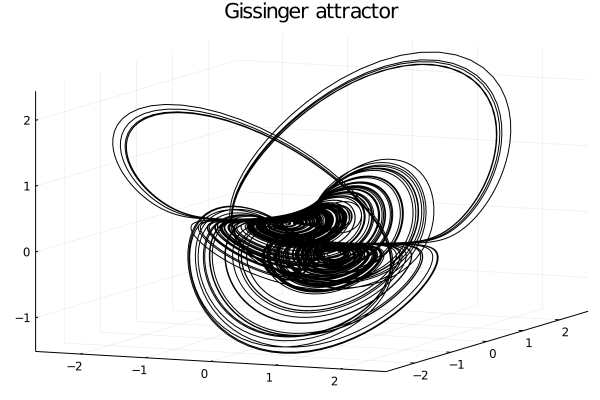

In [36]:
dt = 0.05
# get orginal trajectory
data = trajectory(ds, 2000.0, dt=dt, Ttr=10)

xyz = columns(data)

plot(xyz, leg=false, title="Gissinger attractor", color=:black)

In [37]:
typeof(columns(data))

Tuple{Array{Float64,1},Array{Float64,1},Array{Float64,1}}

Now let us reconstruct the Gissinger system using different combinations of `delay time`, `embedding dimension` for all variables 

In [58]:
ds = Systems.gissinger(ones(3)) # 3D continuous chaotic system, also shown in orbit diagrams tutorial
dt = 0.05
data = trajectory(ds, 2000.0, dt = dt)


k = 1
subplots = []

for i in 1:3, j in 1:3
    τ = [5, 30, 100][j]
    R = reconstruct(xyz[i], 1, τ) #xyz is original trajectory
    push!(subplots, plot(R[:,1], R[:,2], 
                         color=:black, lw=0.8,
                         title="var=$i, \\tau=$τ"))
    k+=1
end



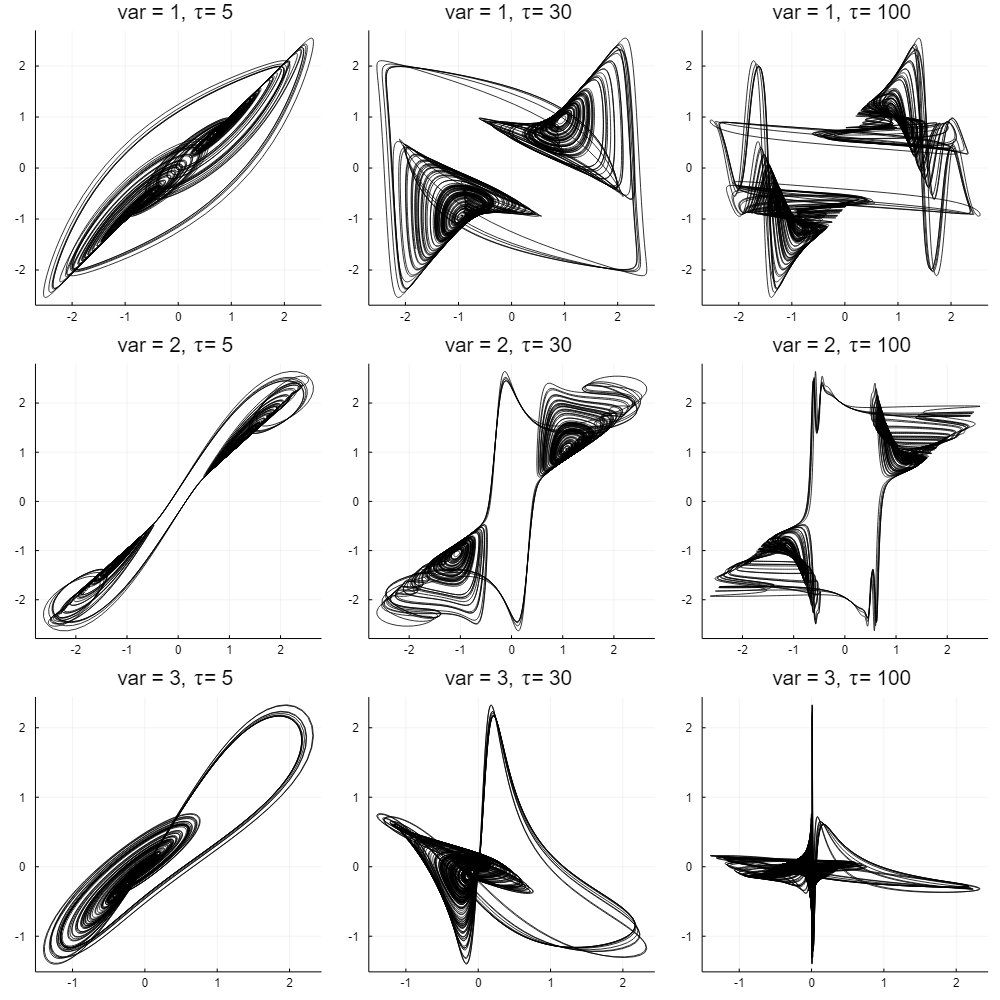

   we see that for $\tau$=5 the delay coordinate embeding is too small while for $\tau$=100 it is too big. $\tau$=30 seems okay, but it is not possible to say if it is optimal

# C. Estimating Optimial delay time

How to select a better Delay time and Embedding dimension ?

* `estimate_delay` estimates delay time $\tau$ using the autocorelation of the signal

* `estimate_dimension` returns an estimator for the amount of temporal neighbours $\gamma$ using Cao's method 

In [65]:
?estimate_delay

search: estimate_delay estimate_dimension estimate_period



```
estimate_delay(s, method::String [, τs = 1:100]; kwargs...) -> τ
```

Estimate an optimal delay to be used in [`reconstruct`](@ref) or [`embed`](@ref). The `method` can be one of the following:

  * `"ac_zero"` : first delay at which the auto-correlation function becomes <0.
  * `"ac_min"` : delay of first minimum of the auto-correlation function.
  * `"mi_min"` : delay of first minimum of mutual information of `s` with itself (shifted for various `τs`). Keywords `nbins, binwidth` are propagated into [`mutualinformation`](@ref).
  * `"exp_decay"` : [`exponential_decay_fit`](@ref) of the correlation function rounded  to an integer (uses least squares on `c(t) = exp(-t/τ)` to find `τ`).
  * `"exp_extrema"` : same as above but the exponential fit is done to the absolute value of the local extrema of the correlation function.

Both the mutual information and correlation function (`autocor`) are computed *only* for delays `τs`. This means that the `min` methods can never return the first value of `τs`!

The method `mi_min` is significantly more accurate than the others and also returns good results for most timeseries. It is however the slowest method (but still quite fast!).


In [66]:
data

3-dimensional Dataset{Float64} with 40001 points
  1.0       1.0        1.0
  0.953553  1.04482    1.04384
  0.90227   1.08889    1.08512
  0.846142  1.13164    1.12344
  0.785246  1.17243    1.15838
  0.719745  1.21067    1.18952
  0.649903  1.24574    1.21643
  0.576079  1.27708    1.23872
  0.498731  1.30417    1.25602
  0.418402  1.32655    1.26807
  0.335711  1.34386    1.27467
  0.251332  1.35583    1.27571
  0.165978  1.36233    1.2712
  ⋮                   
 -1.18435   0.814127  -0.0329953
 -1.19004   0.812066  -0.0345709
 -1.1957    0.810121  -0.0361782
 -1.20133   0.808292  -0.0378202
 -1.20694   0.806582  -0.0395
 -1.21251   0.804994  -0.0412206
 -1.21805   0.803531  -0.0429852
 -1.22355   0.802196  -0.044797
 -1.22901   0.800991  -0.0466593
 -1.23444   0.799921  -0.0485753
 -1.23982   0.79899   -0.0505483
 -1.24515   0.7982    -0.0525818

In [75]:
s = data[:,1] # first coordinate of original trajectory
all_methods = ["ac_zero", "mi_min", "exp_decay"]


for method in all_methods
    τ = estimate_delay(s, method, 0:1:400)
    println("for mrthod $method , τ = $τ")
end

for mrthod ac_zero , τ = 400


┌ Warning: Did not cross 0 value, returning last `τ`.
└ @ DelayEmbeddings /nethome/n.kusampudi/.julia/packages/DelayEmbeddings/XQGJ0/src/traditional_de/estimate_delay.jl:41


for mrthod mi_min , τ = 50
for mrthod exp_decay , τ = 1313


As shown above the zero correlation function method failed completely. Also teh correlation exponentail decay method returned a bad result. These methods are useful only in specific cases, the first one when teh autocorelation function is ossilatory, and the later when the corelation function decays as a exponential 

#  D.Fast mutual information

A good method for estimating a proper delay time is the mutula information between a timeseries S and itselt shifted in time. The function `mutualinformation` compute this quantity. 

In [76]:
mutualinformation(s, 1:100)

100-element Array{Float64,1}:
 5.060496467100156
 4.55054934513552
 4.213678832720253
 3.955648273901833
 3.7412628437017226
 3.5617173793970345
 3.4114526610660088
 3.280412422369197
 3.1634874241119224
 3.0544826300741006
 2.9550161966396407
 2.8707701898965534
 2.7854847554549402
 ⋮
 1.9894311954492991
 1.993847145426999
 1.9958556038793096
 2.000327022853729
 2.0031792193889135
 2.0066885935881027
 2.0093045804334495
 2.0122682612223235
 2.0152392584147893
 2.0157870823649207
 2.019408555131949
 2.0244672812486773